In [1]:
import re
from os import listdir
from os.path import isfile, join
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import math
import pandas as pd
from pandas import Series,DataFrame
import seaborn as sns
import glob

In [2]:
#open all csv files
path =r'C:\Users\Bozhidar\Downloads\This\This\Auswerter + Daten\data_scales'
filenames = glob.glob(path + "/*.csv")
df = pd.concat(map(pd.read_csv, filenames))

In [3]:
#df_from_each_file = (pd.read_csv(f) for f in filenames)
#concatenated_df   = pd.concat(df_from_each_file, ignore_index=True)

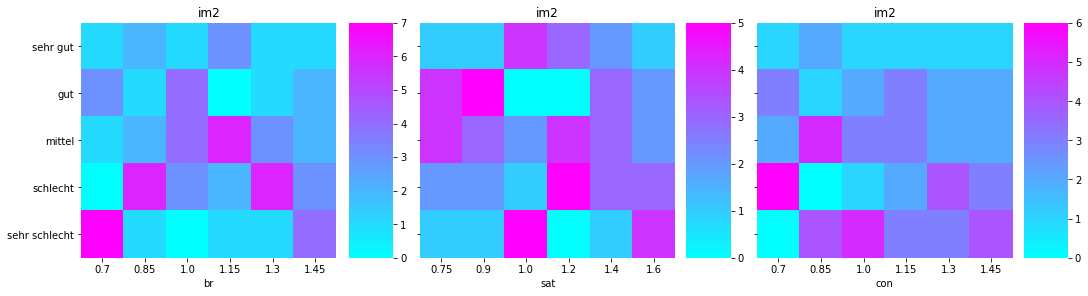

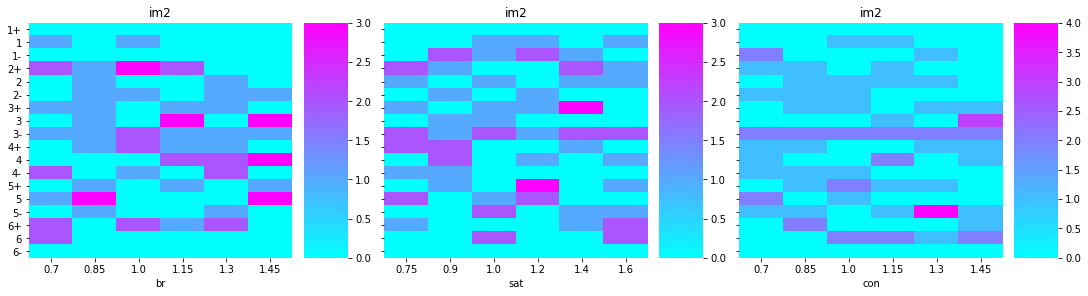

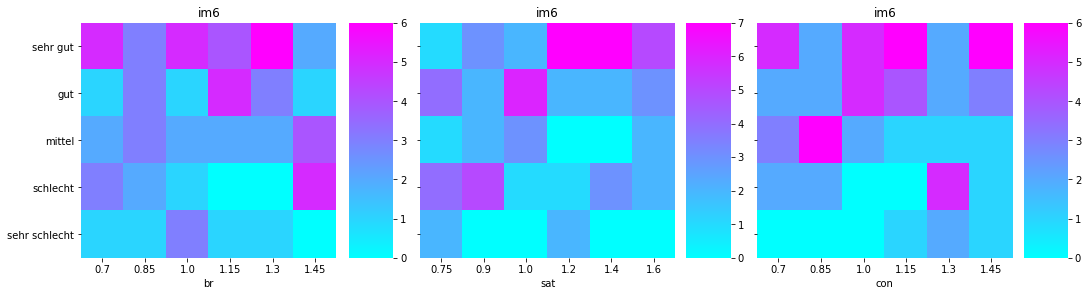

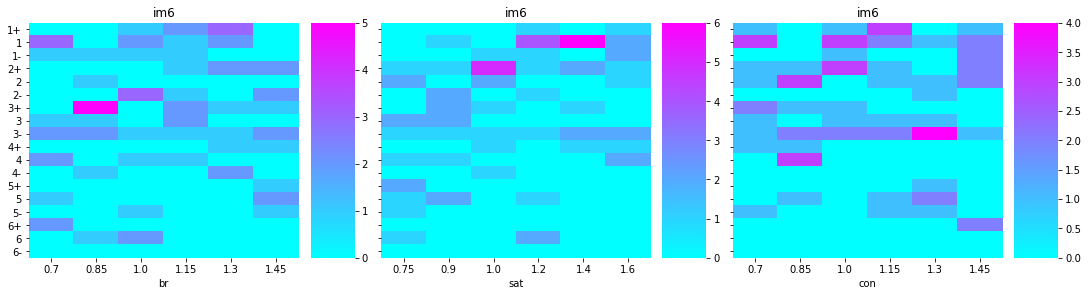

In [4]:
possibleValues = {"words": ["sehr gut", "gut", "mittel", "schlecht", "sehr schlecht"],
                "grades": ['1+', '1', '1-', '2+', '2', '2-', '3+', '3', '3-', '4+', '4', '4-', '5+', '5', '5-', '6+', '6', '6-']}

for image in ["im2", "im6"]:
    for scale in ["words", "grades"]:
        fig, ax = plt.subplots(ncols=3, sharey=True, constrained_layout=True)
        fig.set_figwidth(15)
        for ax_nr, prop in enumerate(["br", "sat", "con"]):
            df_subset = df[(df.scale == scale) & (df.image == image) & (df.property == prop)]
            
            if prop == "sat":
                heatmap_df = pd.DataFrame(columns = [0.75,0.9,1,1.2,1.4,1.6], index = possibleValues[scale])
                for variation in [0.75,0.9,1,1.2,1.4,1.6]:
                    heatmap_df[variation] = df_subset[df_subset.variation == variation].rating.value_counts()
                heatmap_df = heatmap_df.fillna(0)
            
            if prop == "br" or prop == "con":
                heatmap_df = pd.DataFrame(columns = [0.7,0.85,1,1.15,1.3,1.45], index = possibleValues[scale])
                for variation in [0.7,0.85,1,1.15,1.3,1.45]:
                    heatmap_df[variation] = df_subset[df_subset.variation == variation].rating.value_counts()
                heatmap_df = heatmap_df.fillna(0)
            
            g = sns.heatmap(heatmap_df, cmap='cool', ax=ax[ax_nr])
            if ax_nr==0:
                g.set_yticklabels(g.get_yticklabels(), rotation = 0)
            
            ax[ax_nr].set_xlabel(prop)
            ax[ax_nr].set_title(image)
            
            

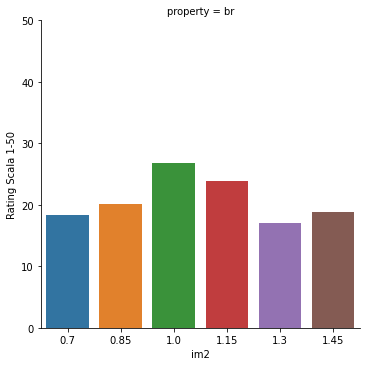

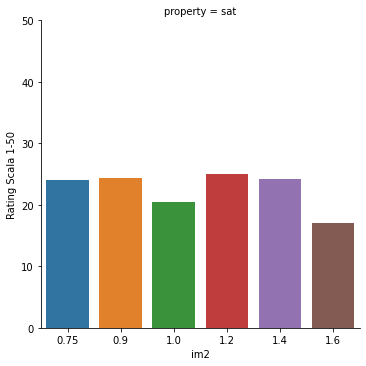

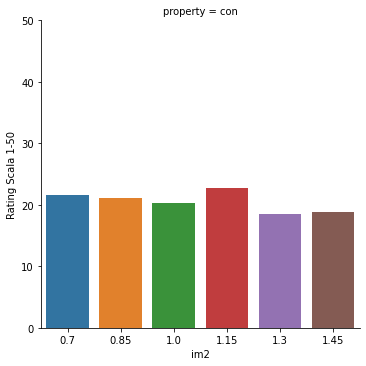

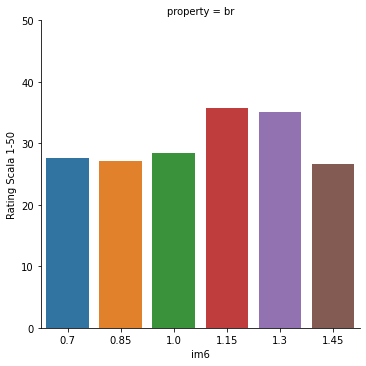

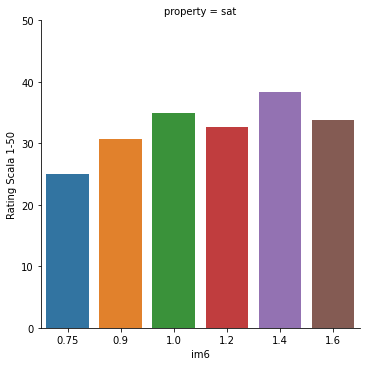

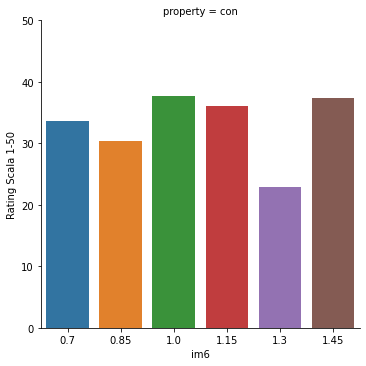

In [9]:
for image in ["im2", "im6"]:
    for scale in ["1_50"]:
        #fig, ax = plt.subplots(ncols=3, sharey=True, constrained_layout=True)
        #fig.set_figwidth(15)
        for ax_nr, prop in enumerate(["br", "sat", "con"]):
            df_subset = df[(df.scale == scale) & (df.image == image) & (df.property == prop)]
            
            if prop == "sat":
                foo1 = df_subset.explode('rating')
                foo1['rating'] = foo1['rating'].astype('float')
                g1 = foo1.groupby((['property', 'variation']))['rating'].mean().reset_index()
                ax[ax_nr] =sns.catplot(x="variation", y="rating",col='property',\
                 data=g1,ci=None,kind='bar')
                ax[ax_nr].set_xticklabels(rotation=0)
                (ax[ax_nr].set_axis_labels(image, "Rating Scala 1-50").
                  set(ylim=(0,50))
                  )
            
            if prop == "br" or prop == "con":
                foo1 = df_subset.explode('rating')
                foo1['rating'] = foo1['rating'].astype('float')
                g1 = foo1.groupby((['property', 'variation']))['rating'].mean().reset_index()
                ax[ax_nr] =sns.catplot(x="variation", y="rating",col='property',\
                 data=g1,ci=None,kind='bar')
                ax[ax_nr].set_xticklabels(rotation=0)
                (ax[ax_nr].set_axis_labels(image, "Rating Scala 1-50").
                  set(ylim=(0,50))
                  )
            
            
            

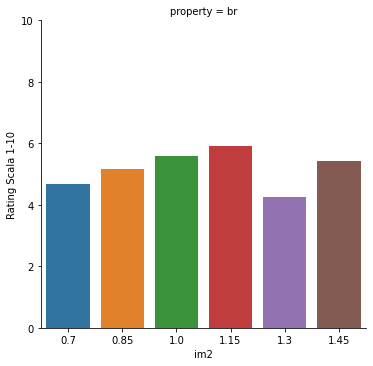

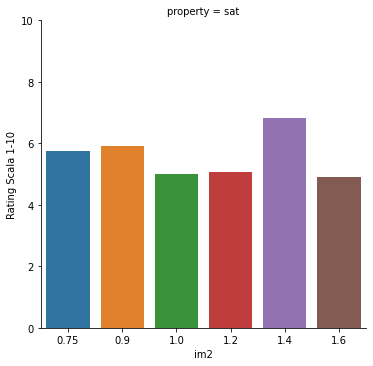

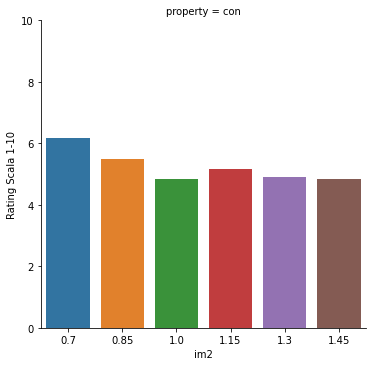

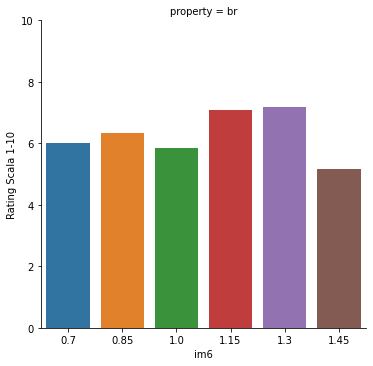

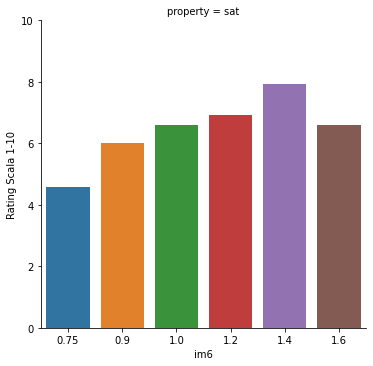

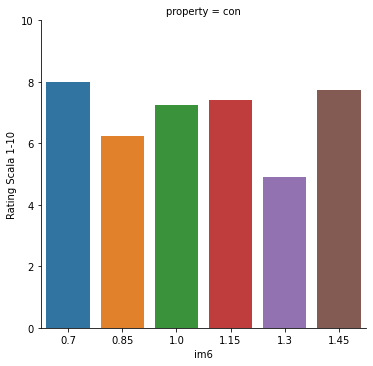

In [67]:
for image in ["im2", "im6"]:
    for scale in ["1_10"]:
        #fig, ax = plt.subplots(ncols=3, sharey=True, constrained_layout=True)
        #fig.set_figwidth(15)
        for ax_nr, prop in enumerate(["br", "sat", "con"]):
            df_subset = df[(df.scale == scale) & (df.image == image) & (df.property == prop)]
            
            if prop == "sat":
                foo1 = df_subset.explode('rating')
                foo1['rating'] = foo1['rating'].astype('float')
                g1 = foo1.groupby((['property', 'variation']))['rating'].mean().reset_index()
                ax[ax_nr] =sns.catplot(x="variation", y="rating",col='property',\
                 data=g1,ci=None,kind='bar')
                ax[ax_nr].set_xticklabels(rotation=0)
                (ax[ax_nr].set_axis_labels(image, "Rating Scala 1-10").
                  set(ylim=(0,10))
                  )
            
            if prop == "br" or prop == "con":
                foo1 = df_subset.explode('rating')
                foo1['rating'] = foo1['rating'].astype('float')
                g1 = foo1.groupby((['property', 'variation']))['rating'].mean().reset_index()
                ax[ax_nr] =sns.catplot(x="variation", y="rating",col='property',\
                 data=g1,ci=None,kind='bar')
                ax[ax_nr].set_xticklabels(rotation=0)
                (ax[ax_nr].set_axis_labels(image, "Rating Scala 1-10").
                  set(ylim=(0,10))
                  )
            
            
            

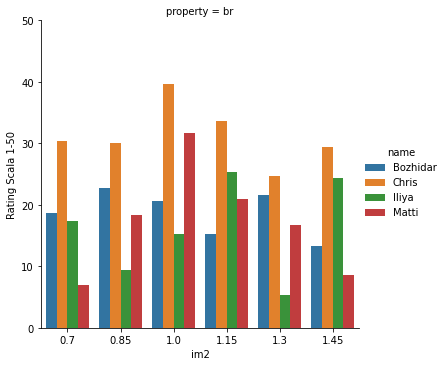

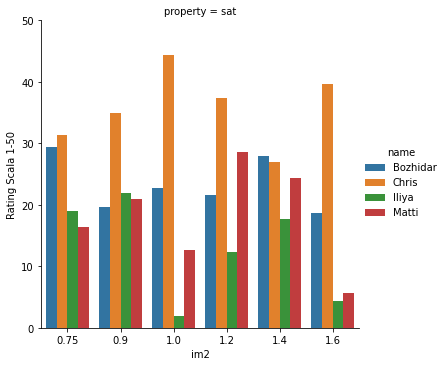

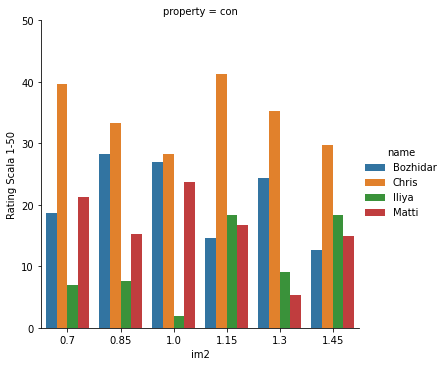

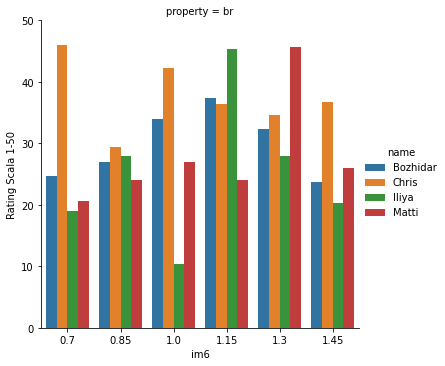

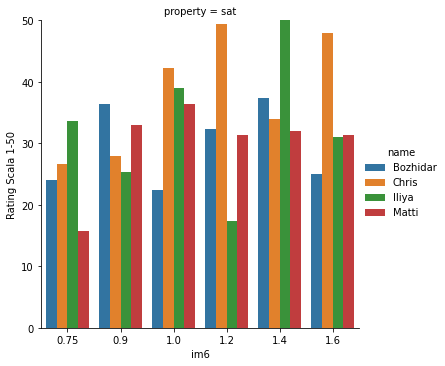

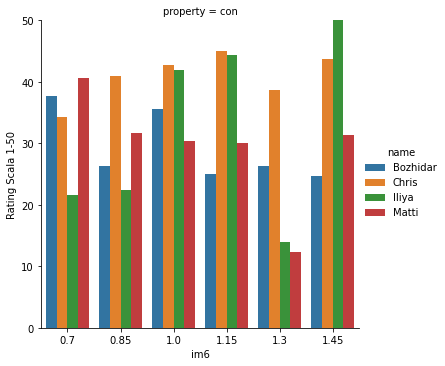

In [8]:
for image in ["im2","im6"]:
    for scale in ["1_50"]:
        #fig, ax = plt.subplots(ncols=3, sharey=True, constrained_layout=True)
        #fig.set_figwidth(15)
        for ax_nr, prop in enumerate(["br", "sat", "con"]):
            df_subset = df[(df.scale == scale) & (df.image == image) & (df.property == prop)]
            
            if prop == "sat":
                foo1 = df_subset.explode('rating')
                foo1['rating'] = foo1['rating'].astype('float')
                g =sns.catplot(x="variation", y="rating", hue='name',col='property',\
                data=foo1,ci=None,kind='bar')
                g.set_xticklabels(rotation=0)
                (g.set_axis_labels(image, "Rating Scala 1-50").
                set(ylim=(0,50))
                )
            
            if prop == "br" or prop == "con":
                foo1 = df_subset.explode('rating')
                foo1['rating'] = foo1['rating'].astype('float')
                g =sns.catplot(x="variation", y="rating", hue='name',col='property',\
                data=foo1,ci=None,kind='bar')
                g.set_xticklabels(rotation=0)
                (g.set_axis_labels(image, "Rating Scala 1-50").
                set(ylim=(0,50))
                )
            
            
            

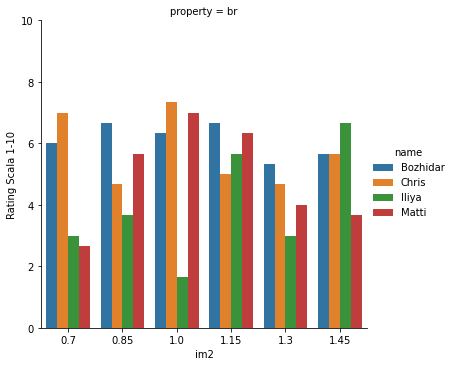

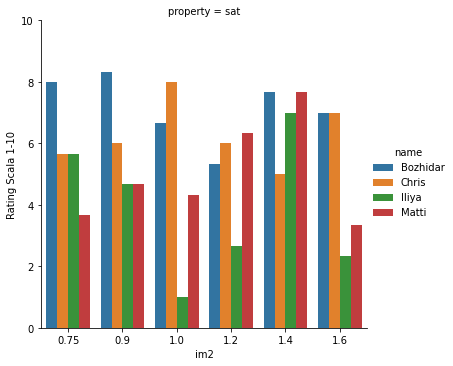

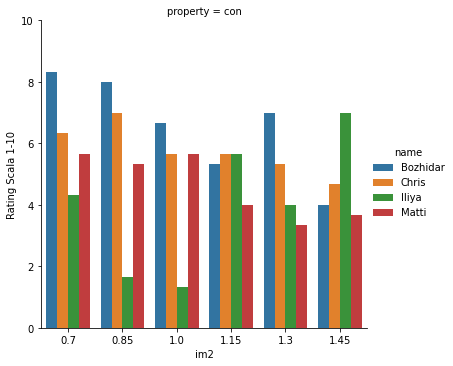

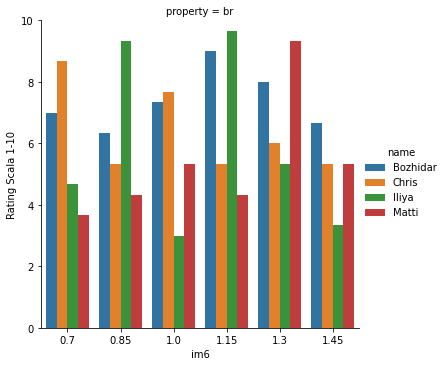

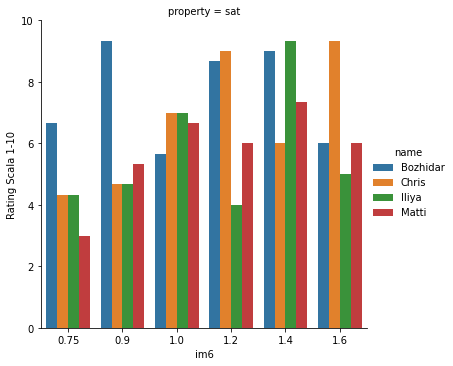

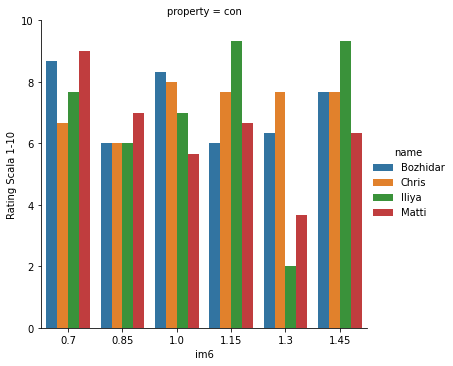

In [10]:
for image in ["im2","im6"]:
    for scale in ["1_10"]:
        #fig, ax = plt.subplots(ncols=3, sharey=True, constrained_layout=True)
        #fig.set_figwidth(15)
        for ax_nr, prop in enumerate(["br", "sat", "con"]):
            df_subset = df[(df.scale == scale) & (df.image == image) & (df.property == prop)]
            
            if prop == "sat":
                foo1 = df_subset.explode('rating')
                foo1['rating'] = foo1['rating'].astype('float')
                g =sns.catplot(x="variation", y="rating", hue='name',col='property',\
                data=foo1,ci=None,kind='bar')
                g.set_xticklabels(rotation=0)
                (g.set_axis_labels(image, "Rating Scala 1-10").
                set(ylim=(0,10))
                )
            
            if prop == "br" or prop == "con":
                foo1 = df_subset.explode('rating')
                foo1['rating'] = foo1['rating'].astype('float')
                g =sns.catplot(x="variation", y="rating", hue='name',col='property',\
                data=foo1,ci=None,kind='bar')
                g.set_xticklabels(rotation=0)
                (g.set_axis_labels(image, "Rating Scala 1-10").
                set(ylim=(0,10))
                )
            
            
            